Round 2 of looking for mutuall information between group abundances, metabolic coefficients, and pH. 

What's New? Now we have a hierarchical clustering with both phenotype and genotype information. We also have model-grounded metabolic coefficients. 

In [7]:


import numpy as np
import pandas as pd

from mgsa.helpers import plot
from mgsa.io import perturbed_pHs
from mgsa.information import information_2D, pairwise_cmi_analysis, get_info, get_info_control, native_pH

soils = ['Soil3', 'Soil5', 'Soil6', 'Soil9', 'Soil11', 'Soil12', 'Soil14', 'Soil15', 'Soil16', 'Soil17']

native = np.zeros(len(soils))
for i, soil in enumerate(soils):
    native[i] = native_pH(soil)

#Load metabolic parameters

rA_chl_pos = pd.read_csv('../out/metabolic_parameters/rA_chl_pos.tsv', sep = '\t', header = None).values
rI_chl_pos = pd.read_csv('../out/metabolic_parameters/rI_chl_pos.tsv', sep = '\t', header = None).values
gA_chl_neg = pd.read_csv('../out/metabolic_parameters/gA_chl_neg.tsv', sep = '\t', header = None).values
gI_chl_neg = pd.read_csv('../out/metabolic_parameters/gI_chl_neg.tsv', sep = '\t', header = None).values
rA_chl_neg = pd.read_csv('../out/metabolic_parameters/rA_chl_neg.tsv', sep = '\t', header = None).values
rI1_chl_neg = pd.read_csv('../out/metabolic_parameters/rI1_chl_neg.tsv', sep = '\t', header = None).values
rI2_chl_neg = pd.read_csv('../out/metabolic_parameters/rI2_chl_neg.tsv', sep = '\t', header = None).values

#Load in variant distributions for nar and nir

nar_relative_expression_t0_chl_neg = np.load('../out/model_regression/model1/nar_relative_expression_t0_chl_neg.npy')
nar_relative_expression_t0_chl_pos = np.load('../out/model_regression/model1/nar_relative_expression_t0_chl_pos.npy')
nar_relative_expression_t9_chl_neg = np.load('../out/model_regression/model1/nar_relative_expression_t9_chl_neg.npy')
nar_relative_expression_t9_chl_pos = np.load('../out/model_regression/model1/nar_relative_expression_t9_chl_pos.npy')
nir_relative_expression_t0_chl_neg = np.load('../out/model_regression/model1/nir_relative_expression_t0_chl_neg.npy')
nir_relative_expression_t0_chl_pos = np.load('../out/model_regression/model1/nir_relative_expression_t0_chl_pos.npy')
nir_relative_expression_t9_chl_neg = np.load('../out/model_regression/model1/nir_relative_expression_t9_chl_neg.npy')
nir_relative_expression_t9_chl_pos = np.load('../out/model_regression/model1/nir_relative_expression_t9_chl_pos.npy')


info nar --> rA, CHL+ 2.2340429046706873


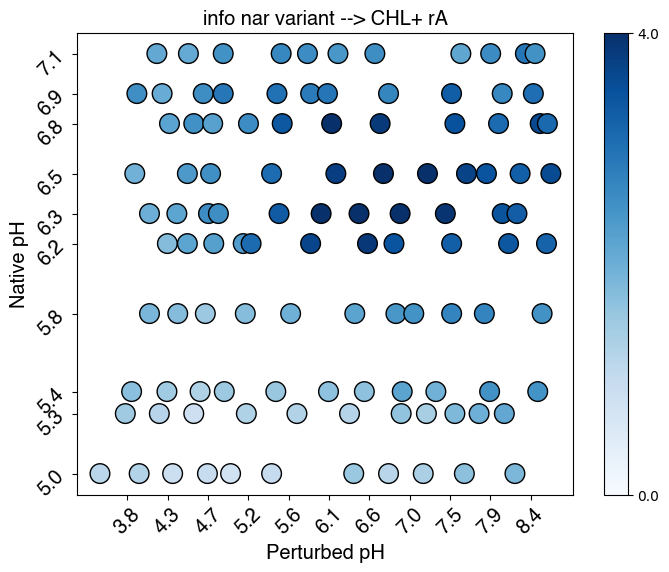

info nir --> rI, CHL+ -0.05518828855586704


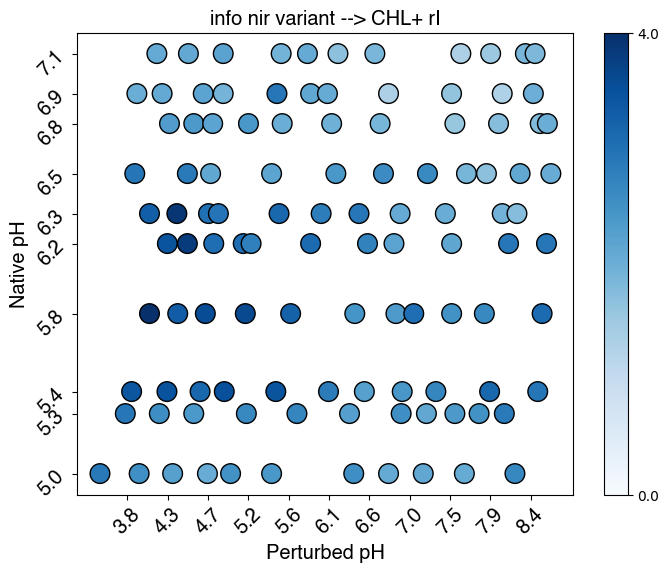

info nar --> gA, CHL- 1.0488520394170078


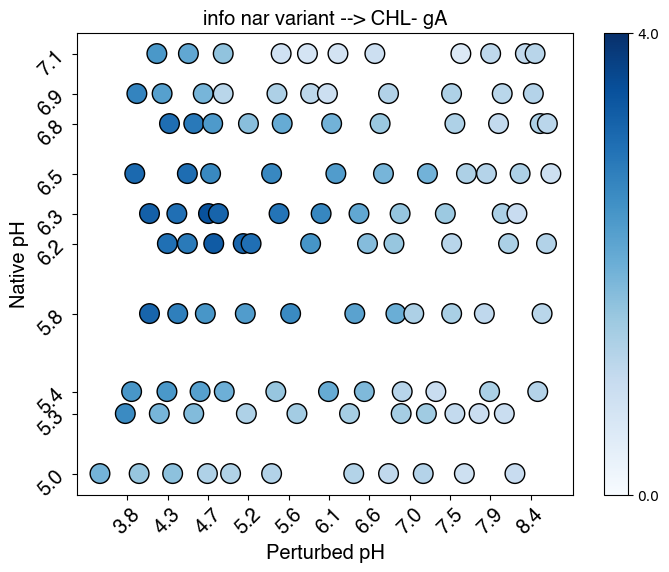

info nir --> gI, CHL- 0.19499917804767058


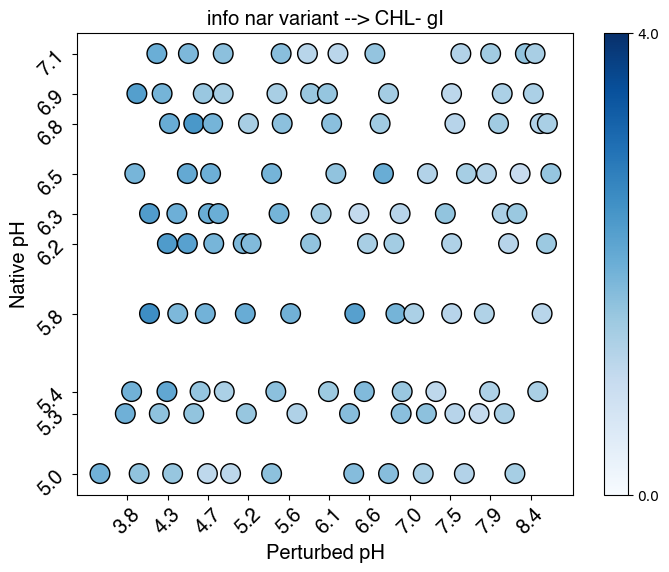

info nar --> rA, CHL- 1.6108245211499603


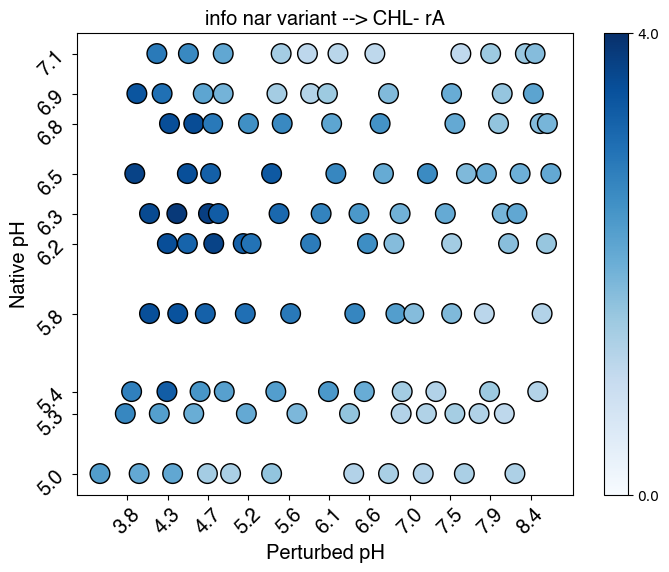

info nir --> rI, CHL- 0.2940159104025847


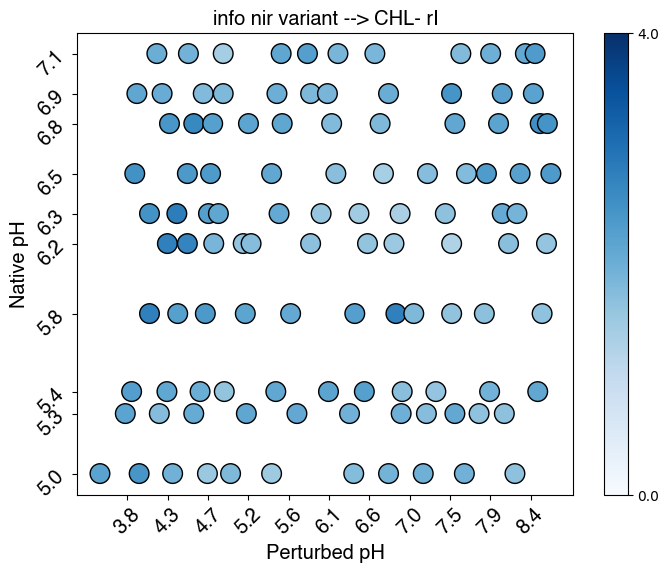

In [8]:
neighborhood_size = 40
vmax = 4
#nar variants --> CHL+ rA

info_nar_to_rA_chl_pos = np.zeros((10,11))
entropy = np.zeros((10,11))
tot_info = 0
for i in range(6):
    temp = nar_relative_expression_t0_chl_pos[:,i]
    full = np.tile(temp.reshape(-1, 1), (1, 11))
    info = information_2D(full, rA_chl_pos, n_bootstrap=10, neighborhood_size=neighborhood_size)
    info_nar_to_rA_chl_pos += info[0]
    entropy += info[4]
    tot_info += get_info(full, rA_chl_pos)[0]
print('info nar --> rA, CHL+', tot_info)
efficiency = entropy / (info_nar_to_rA_chl_pos + 0.00001)
plot(info_nar_to_rA_chl_pos, 'info nar variant --> CHL+ rA', vmin = 0, vmax = vmax)
#plot(entropy, 'entropy')
#plot(efficiency, 'efficiency')


#nir variants --> CHL+ rI

info_nir_to_rI_chl_pos = np.zeros((10,11))
entropy = np.zeros((10,11))
tot_info = 0
for i in range(6):
    temp = nir_relative_expression_t0_chl_pos[:,i]
    full = np.tile(temp.reshape(-1, 1), (1, 11))
    info_nir_to_rI_chl_pos += information_2D(full, rI_chl_pos, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    tot_info += get_info(full, rI_chl_pos)[0]
print('info nir --> rI, CHL+', tot_info)
plot(info_nir_to_rI_chl_pos, 'info nir variant --> CHL+ rI', vmin = 0, vmax = vmax)

#nar variants --> CHL- gA

info_nar_to_gA_chl_neg = np.zeros((10,11))
entropy = np.zeros((10,11))
tot_info = 0
for i in range(6):
    temp = nar_relative_expression_t0_chl_neg[:,i]
    full = np.tile(temp.reshape(-1, 1), (1, 11))
    info_nar_to_gA_chl_neg += information_2D(full, gA_chl_neg, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    tot_info += get_info(full, gA_chl_neg)[0]
print('info nar --> gA, CHL-', tot_info)
plot(info_nar_to_gA_chl_neg, 'info nar variant --> CHL- gA', vmin = 0, vmax = vmax)


#nir variants --> CHL- gI

info_nir_to_gI_chl_neg = np.zeros((10,11))
entropy = np.zeros((10,11))
tot_info = 0
for i in range(6):
    temp = nir_relative_expression_t0_chl_neg[:,i]
    full = np.tile(temp.reshape(-1, 1), (1, 11))
    info_nir_to_gI_chl_neg += information_2D(full, gI_chl_neg, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    tot_info += get_info(full, gI_chl_neg)[0]
print('info nir --> gI, CHL-', tot_info)
plot(info_nir_to_gI_chl_neg, 'info nar variant --> CHL- gI', vmin = 0, vmax = vmax)

#nar variants --> CHL- rA

info_nar_to_rA_chl_neg = np.zeros((10,11))
entropy = np.zeros((10,11))
tot_info = 0
for i in range(6):
    temp = nar_relative_expression_t0_chl_neg[:,i]
    full = np.tile(temp.reshape(-1, 1), (1, 11))
    info_nar_to_rA_chl_neg += information_2D(full, rA_chl_neg, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    tot_info += get_info(full, rA_chl_neg)[0]
print('info nar --> rA, CHL-', tot_info)
plot(info_nar_to_rA_chl_neg, 'info nar variant --> CHL- rA', vmin = 0, vmax = vmax)

#nir variants --> CHL- rI1

info_nir_to_rI_chl_neg = np.zeros((10,11))
entropy = np.zeros((10,11))
tot_info = 0
for i in range(6):
    temp = nir_relative_expression_t0_chl_neg[:,i]
    full = np.tile(temp.reshape(-1, 1), (1, 11))
    info_nir_to_rI_chl_neg += information_2D(full, rI1_chl_neg, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    tot_info += get_info(full, rI1_chl_neg)[0]
print('info nir --> rI, CHL-', tot_info)
plot(info_nir_to_rI_chl_neg, 'info nir variant --> CHL- rI', vmin = 0, vmax = vmax)





Also, between perturbed pH and model parameters.

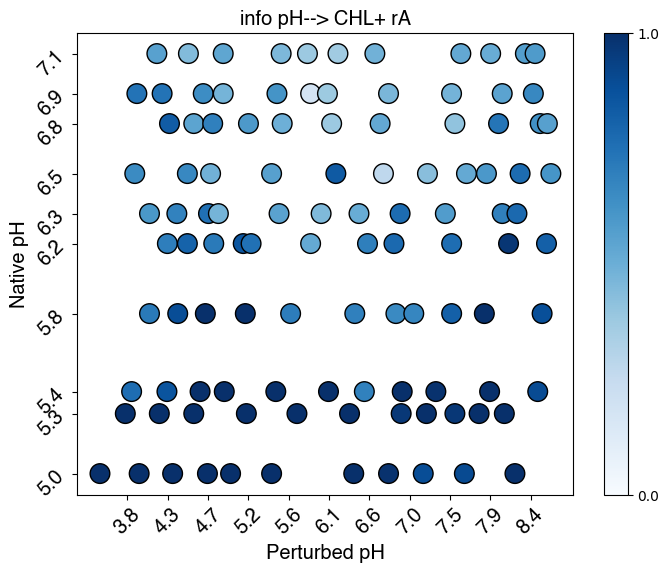

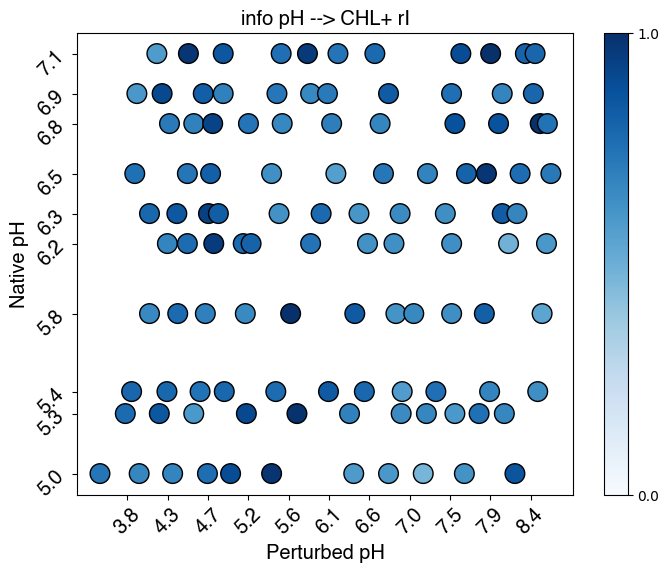

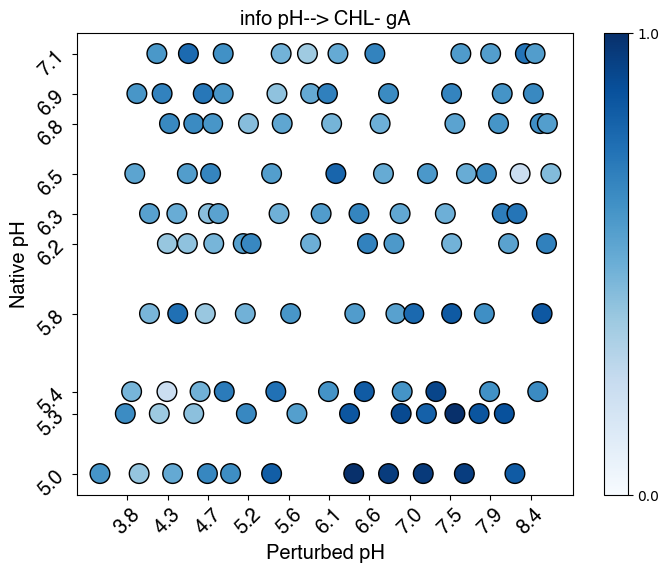

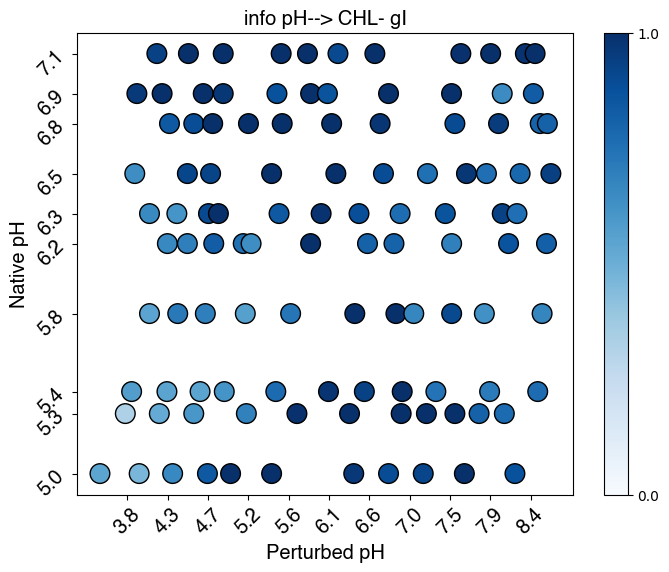

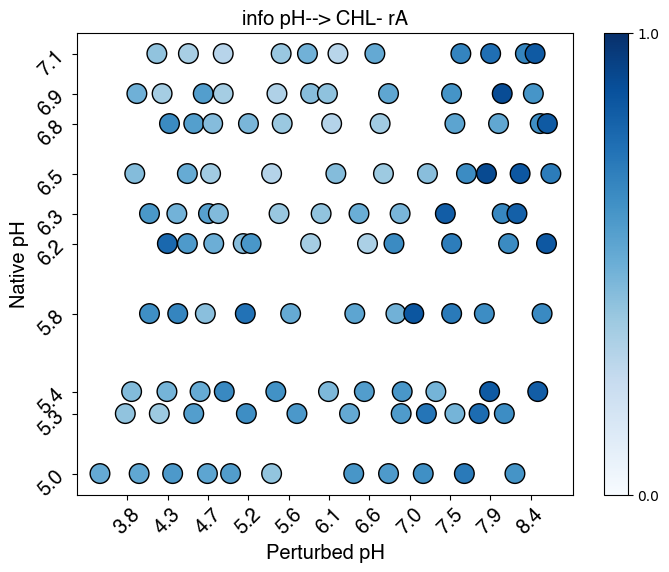

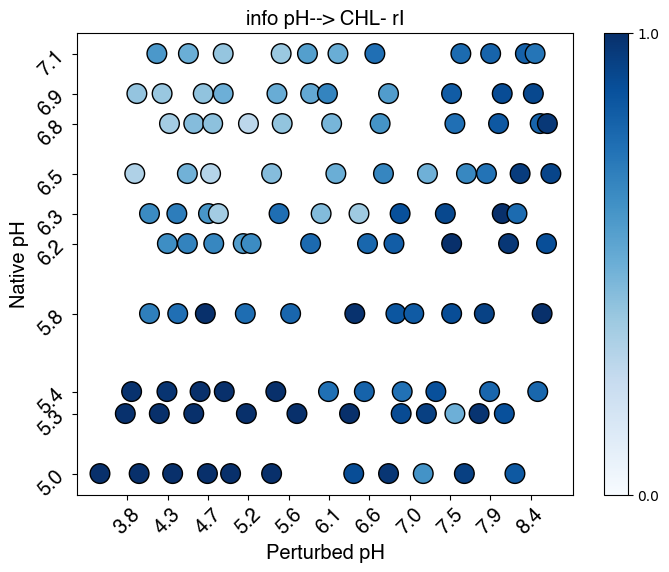

In [5]:
perturbed = np.linspace(3.8,8.4, 11)
pH = np.zeros((10, 11))
for i, row in enumerate(pH):
    row += perturbed_pHs(soils[i])
    
vmax = 1
    
#nar variants --> CHL+ rA

info_pH_to_rA_chl_pos = information_2D(pH, rA_chl_pos, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    
plot(info_pH_to_rA_chl_pos, 'info pH--> CHL+ rA', vmin = 0, vmax = vmax)


#nir variants --> CHL+ rI

info_pH_to_rI_chl_pos = information_2D(pH, rI_chl_pos, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    
plot(info_pH_to_rI_chl_pos, 'info pH --> CHL+ rI', vmin = 0, vmax = vmax)

#nar variants --> CHL- gA

info_pH_to_gA_chl_neg = information_2D(pH, gA_chl_neg, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    
plot(info_pH_to_gA_chl_neg, 'info pH--> CHL- gA', vmin = 0, vmax = vmax)


#nir variants --> CHL- gI

info_pH_to_gI_chl_neg = information_2D(pH, gI_chl_neg, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    
plot(info_pH_to_gI_chl_neg, 'info pH--> CHL- gI', vmin = 0, vmax = vmax)

#nar variants --> CHL- rA

info_pH_to_rA_chl_neg = information_2D(pH, rA_chl_neg, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    
plot(info_pH_to_rA_chl_neg, 'info pH--> CHL- rA', vmin = 0, vmax = vmax)

#nir variants --> CHL- rI


info_pH_to_rI_chl_neg = information_2D(pH, rI_chl_neg, n_bootstrap=10, neighborhood_size=neighborhood_size)[0]
    
plot(info_pH_to_rI_chl_neg, 'info pH--> CHL- rI', vmin = 0, vmax = vmax)

    

    
    